In [3]:
import spacy
from collections import Counter
import pandas as pd
from tqdm import tqdm

# Load Spacy's Spanish NER model
nlp = spacy.load("es_core_news_sm")

# Load the data
file_path = '../../Resultados/Beto_tagged.csv'
data = pd.read_csv(file_path, delimiter=';')

columns_to_drop = data.filter(like='Unnamed').columns
data = data.drop(columns=columns_to_drop)
data.head()

,file,Año,Periódico,Ciudad,Texto,Sentimiento,predictions,negative_probs,neutral_probs,positive_probs,ironic_probs,Texto_Lematizado,Sustantivos
0,../../Datos/19th_century_Latam_Newspapers_1/PF...,1870,Los loros,Popayán,publicacion semanal ignoramos si sus restos f...,NEUTRO,1.0,9.996460,55.532199,33.521801,0.949539,"['publicacion', 'semanal', 'ignorar', 'resto',...","['restos', 'fin', 'soldados', 'puestos', 'comb..."
1,../../Datos/19th_century_Latam_Newspapers_1/PF...,1870,Los loros,Popayán,se presente en su oficina el que monto en la g...,NEUTRO,1.0,17.339712,63.219225,18.328328,1.112728,"['presentar', 'oficina', 'monto', 'gallina', '...","['oficina', 'monto', 'gallina', 'miedo', 'desp..."
2,../../Datos/19th_century_Latam_Newspapers_1/PF...,1870,Los loros,Popayán,"de baron de las tenazas, a don agustin castill...",POSITIVO,2.0,7.059140,42.583779,49.531049,0.826027,"['bar', 'tenaza', 'don', 'agustin', 'castillo'...","['tenazas', 'don', 'agustin', 'castillo', 'mar..."
3,../../Datos/19th_century_Latam_Newspapers_1/PF...,1870,Los loros,Popayán,"al articulo presente, en una oracion ferviente...",POSITIVO,2.0,6.416973,21.443181,71.021354,1.118488,"['articulo', 'presente', 'oracion', 'ferviente...","['articulo', 'oracion', 'satanas', 'jamas', 'i..."
4,../../Datos/19th_century_Latam_Newspapers_1/PF...,1870,Los loros,Popayán,quien es el que desde aca tantas noticias envi...,NEUTRO,1.0,11.500288,60.579348,27.018249,0.902115,"['aca', 'tanto', 'noticia', 'envia', 'adivinar...","['noticias', 'nadie', 'ano', 'plazo', 'bribona..."


In [ ]:
def add_nouns_to_data(data):

    # Initialize a list to hold all nouns
    all_nouns = []

    # Process each text to extract nouns
    for row in tqdm(data.iterrows()):
        text = row[1]['Texto']
        doc = nlp(text)
        nouns = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN']]
        all_nouns.append(nouns)
    data['Sustantivos'] = all_nouns

add_nouns_to_data(data)
data.to_csv('../Resultados/Beto_tagged.csv', sep=';')

In [5]:
def extract_n_most_common_nouns(data, n=30, min_year=None, max_year=None):
    # Copia el DataFrame para evitar modificar el original
    df_filtrado = data.copy()

    # Filtra por año si se especifica
    if min_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] >= min_year]
    if max_year:
        df_filtrado = df_filtrado[df_filtrado['Año'] <= max_year]

    # Extrae los sustantivos de la columna 'Sustantivos'
    all_nouns = []
    for item in df_filtrado['Sustantivos']:
        # Convierte la cadena de texto a una lista de sustantivos
        text = item[1:-1].replace("'", "").split(", ")
        all_nouns.extend(text)

    # Cuenta la frecuencia de cada sustantivo
    noun_freq = Counter(all_nouns)

    # Encuentra los sustantivos que aparecen en todos los textos
    common_nouns = [noun for noun, freq in noun_freq.items() if freq == len(df_filtrado)]

    # Obtiene los n sustantivos más comunes
    most_common_nouns = noun_freq.most_common(n)

    return common_nouns, most_common_nouns

# Ejemplo de uso
common_nouns, most_common_nouns = extract_n_most_common_nouns(data, n=30, min_year=1870, max_year=1880)

print("Sustantivos que aparecen en todos los textos:", common_nouns)
print("Los 30 sustantivos más comunes:", most_common_nouns)

Sustantivos que aparecen en todos los textos: []
Los 30 sustantivos más comunes: [('_', 240), ('pueblo', 142), ('dia', 136), ('gobierno', 130), ('parte', 128), ('hombre', 114), ('hombres', 113), ('partido', 113), ('tiempo', 108), ('vida', 103), ('guerra', 100), ('vez', 99), ('republica', 99), ('madre', 97), ('estado', 95), ('casa', 87), ('anos', 85), ('nombre', 85), ('dios', 85), ('doctor', 83), ('amor', 80), ('fin', 79), ('don', 75), ('colombia', 75), ('mundo', 74), ('camarilla', 71), ('patria', 70), ('periodico', 69), ('corazon', 68), ('derecho', 68)]


In [13]:
common_nouns, most_common_nouns = extract_n_most_common_nouns(data, n=60)
most_common_nouns.sort(key=lambda x: x[1], reverse=True)
most_common_nouns = most_common_nouns[1:]
most_common_nouns

[('tiempo', 3091),
 ('gobierno', 2959),
 ('parte', 2888),
 ('dia', 2756),
 ('vida', 2701),
 ('hombre', 2362),
 ('doctor', 2337),
 ('bogota', 2293),
 ('ciudad', 2279),
 ('vez', 2269),
 ('anos', 2204),
 ('nombre', 2081),
 ('pueblo', 2034),
 ('hombres', 2016),
 ('patria', 1986),
 ('colombia', 1979),
 ('fin', 1902),
 ('numero', 1888),
 ('senor', 1838),
 ('casa', 1837),
 ('general', 1835),
 ('ano', 1808),
 ('republica', 1763),
 ('pais', 1751),
 ('mundo', 1663),
 ('alli', 1645),
 ('dios', 1600),
 ('muerte', 1481),
 ('obra', 1475),
 ('san', 1427),
 ('dias', 1418),
 ('amor', 1407),
 ('_', 1350),
 ('tierra', 1341),
 ('historia', 1338),
 ('estado', 1332),
 ('libertad', 1324),
 ('noche', 1320),
 ('presidente', 1311),
 ('guerra', 1310),
 ('despues', 1287),
 ('mano', 1283),
 ('familia', 1277),
 ('luz', 1270),
 ('corazon', 1247),
 ('alma', 1239),
 ('amigo', 1238),
 ('lugar', 1227),
 ('cosa', 1223),
 ('medio', 1223),
 ('juan', 1222),
 ('veces', 1213),
 ('habia', 1190),
 ('partido', 1158),
 ('sociedad

In [14]:
extract_n_most_common_nouns(data, n=5, min_year=1845, max_year=1845)

([], [('u.', 120), ('oso', 80), ('nacion', 80), ('palabra', 78), ('modo', 76)])

In [15]:
all_nouns = []
for item in data.Sustantivos:
    text = item[2:-2]
    text = text.split("','")
    all_nouns.extend(text)

In [16]:
print(len(all_nouns))

16967


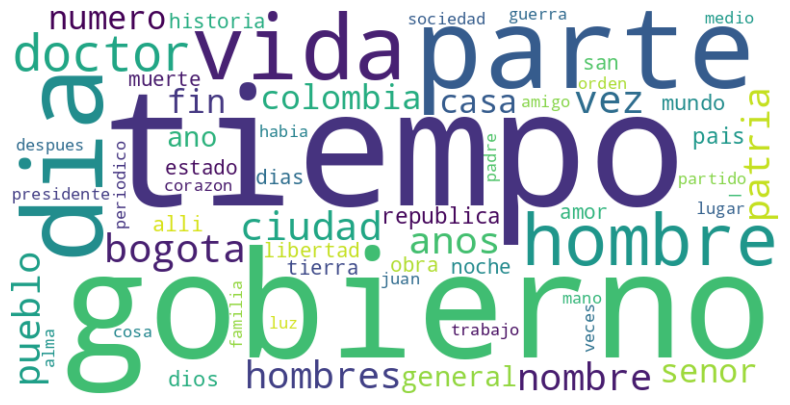

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Preparar los datos para la nube de palabras
# Convierte la lista de tuplas en un diccionario
word_freq = dict(most_common_nouns)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()